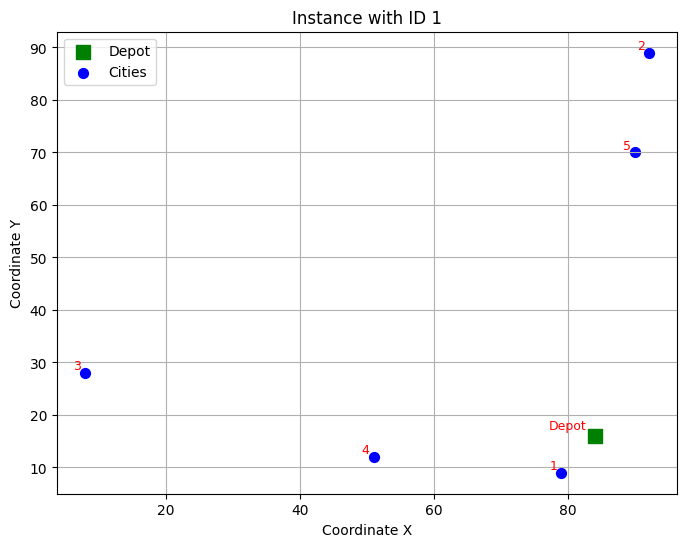

In [27]:
import sqlite3
import matplotlib.pyplot as plt

def plot_mTSP_instance(instance_id, db_file="mTSP_instances.sqlite3"):

    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Verify if instance exists
    cursor.execute("SELECT * FROM instances WHERE instance_id = ?", (instance_id,))
    instance = cursor.fetchone()
    if instance is None:
        print(f"The instance with the ID {instance_id} does not exist.")
        conn.close()
        return

    # Get city coordinates
    cursor.execute("SELECT city_id, x, y FROM cities WHERE instance_id = ?", (instance_id,))
    cities = cursor.fetchall()

    if not cities:
        print(f"The instance with the ID {instance_id} does not have cities.")
        conn.close()
        return

    conn.close()

    # Plot the cities
    plt.figure(figsize=(8, 6))
    for city_id, x, y in cities:
        if city_id == 0: 
            plt.scatter(x, y, c='green', marker='s', label='Depot', s=100)  
            plt.text(x - 1.2, y + 1.2, 'Depot', fontsize=9, ha='right', color='red')
        else:
            plt.scatter(x, y, c='blue', label='Cities' if city_id == 1 else "", s=50)  
            plt.text(x - 0.6, y + 0.6, str(city_id), fontsize=9, ha='right', color='red')


    plt.title(f"Instance with ID {instance_id}")
    plt.xlabel("Coordinate X")
    plt.ylabel("Coordinate Y")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_mTSP_instance(instance_id=1, db_file="test_mTSP.sqlite3")

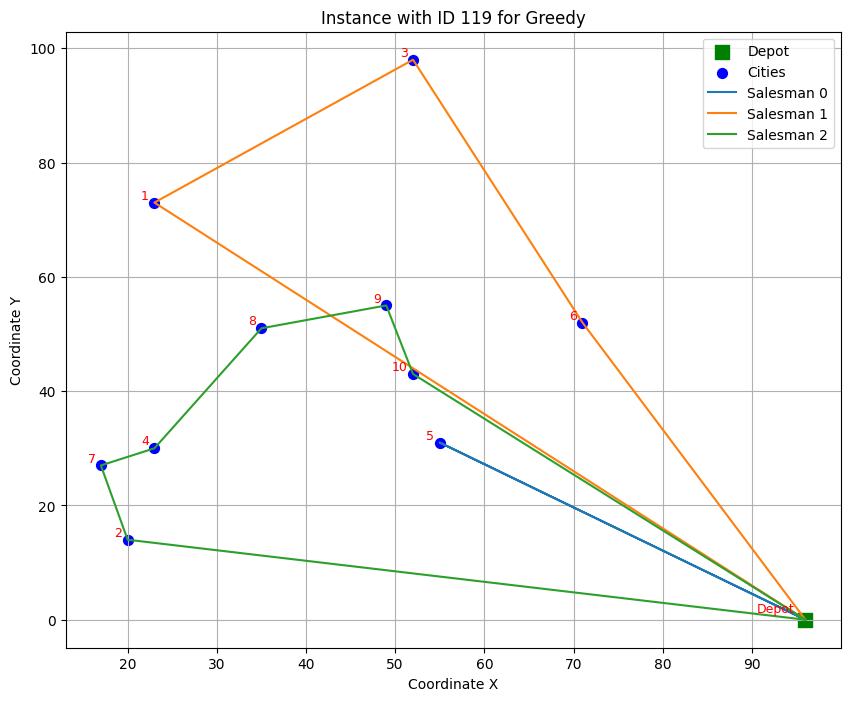

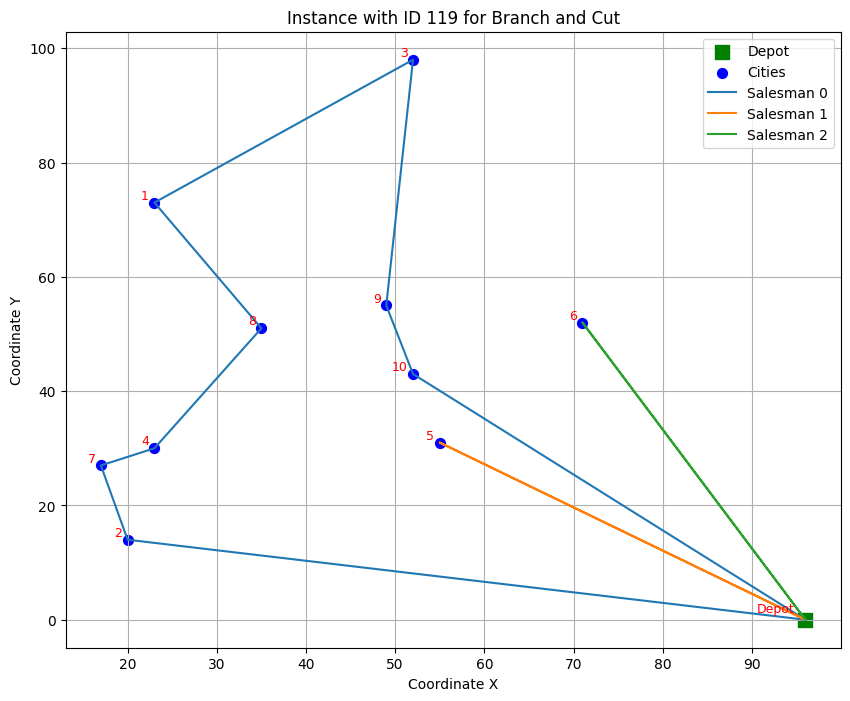

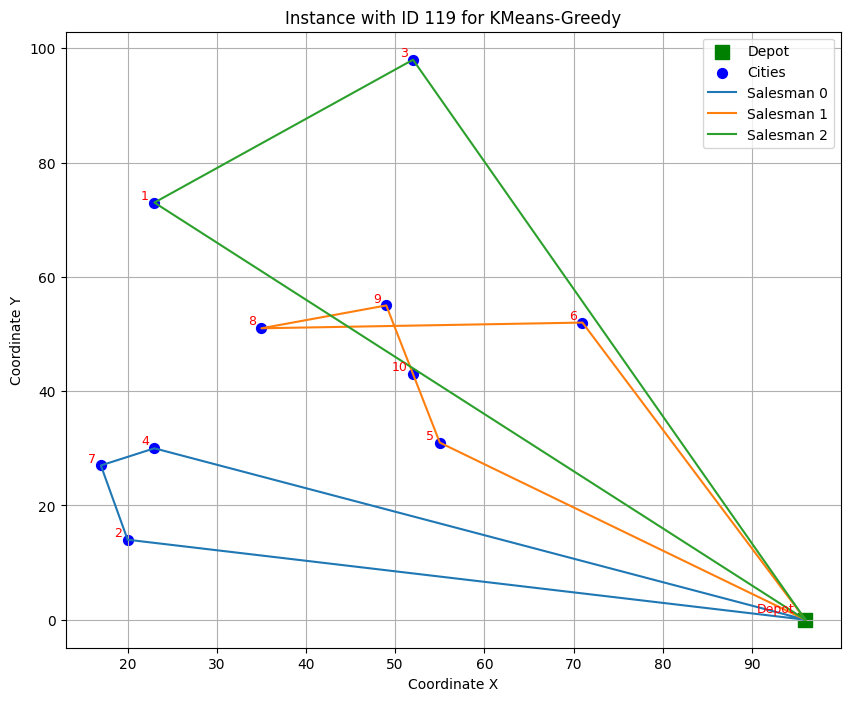

In [ ]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

def plot_mTSP_instance_with_routes(instance_id, strategy, db_file="mTSP_instances.sqlite3"):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Verify if instance exists
    cursor.execute("SELECT * FROM instances WHERE instance_id = ?", (instance_id,))
    instance = cursor.fetchone()
    if instance is None:
        print(f"The instance with the ID {instance_id} does not exist.")
        conn.close()
        return

    # Get city coordinates
    cursor.execute("SELECT city_id, x, y FROM cities WHERE instance_id = ?", (instance_id,))
    cities = cursor.fetchall()

    if not cities:
        print(f"The instance with the ID {instance_id} does not have cities.")
        conn.close()
        return

    # Get routes for the instance with the selected strategy
    cursor.execute(
        "SELECT salesman_id, route FROM routes WHERE instance_id = ? AND strategy = ?",
        (instance_id, strategy)
    )
    routes = cursor.fetchall()

    if not routes:
        print(f"No routes found for instance ID {instance_id} with strategy '{strategy}'.")
        conn.close()
        return

    conn.close()

    # Create a dictionary for city coordinates
    city_coords = {city_id: (x, y) for city_id, x, y in cities}

    # Plot the cities
    plt.figure(figsize=(10, 8))
    for city_id, (x, y) in city_coords.items():
        if city_id == 0:  # Depot
            plt.scatter(x, y, c='green', marker='s', label='Depot', s=100)
            plt.text(x - 1.2, y + 1.2, 'Depot', fontsize=9, ha='right', color='red')
        else:
            plt.scatter(x, y, c='blue', label='Cities' if city_id == 1 else "", s=50)
            plt.text(x - 0.6, y + 0.6, str(city_id), fontsize=9, ha='right', color='red')

    # Define colors for salesmen
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i % 10) for i in range(len(routes))]  

    # Plot the routes
    for i, (salesman_id, route) in enumerate(routes):
        route = eval(route)  # Convert the string representation of the route to a list
        route_coords = [city_coords[city_id] for city_id in route]
        x_coords, y_coords = zip(*route_coords)
        plt.plot(x_coords, y_coords, label=f"Salesman {salesman_id}", color=colors[i])

    plt.title(f"Instance with ID {instance_id} for {strategy}")
    plt.xlabel("Coordinate X")
    plt.ylabel("Coordinate Y")
    plt.grid(True)
    plt.legend()
    plt.show()


plot_mTSP_instance_with_routes(instance_id=44, strategy="Greedy", db_file="train_mTSP.sqlite3")
plot_mTSP_instance_with_routes(instance_id=44, strategy="KMeans-Greedy", db_file="train_mTSP.sqlite3")
plot_mTSP_instance_with_routes(instance_id=44, strategy="Branch and Cut", db_file="train_mTSP.sqlite3")
plot_mTSP_instance_with_routes(instance_id=44, strategy="Ant Colony", db_file="train_mTSP.sqlite3")